In [54]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [57]:
sample_rate      = 48000
freq             = 1000
duration_periods = 1
comment          = "1kHz single tone, sampling rate: 48kHz"
file_name = "1khz.awv"

#
# Generate floating point waveform data
#

duration_seconds = duration_periods / freq
t = np.linspace(0, duration_seconds, int(sample_rate*duration_seconds), False)

i_float = np.sin(2*np.pi * freq * t)
q_float = np.cos(2*np.pi * freq * t)

Number of samples: 48
Duration: 0.001 sec


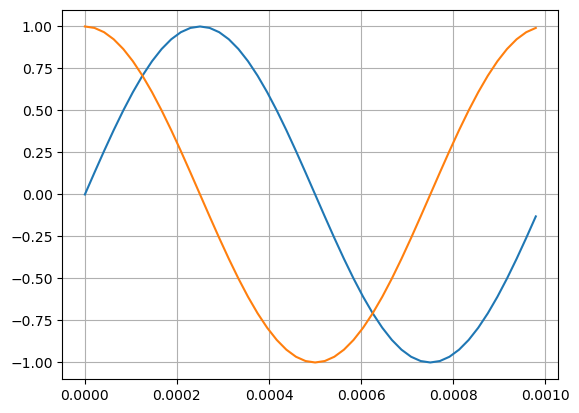

In [56]:
print("Number of samples:",len(i_float))
print("Duration:", duration_seconds, "sec")

plt.plot(t, i_float)
plt.plot(t, q_float)
plt.grid()
plt.show()

In [58]:
#
# Normalize to 32 bit unsigned int
#

i_int = np.uint32(float(0x2000) + float(0x1fff) * i_float)
q_int = np.uint32(float(0x2000) + float(0x1fff) * q_float)

In [62]:
#
# Write file
#

date_str = datetime.now().strftime("%Y/%m/%d;%H:%M:%S")

with open(file_name, "wb") as file:
    file.write(b"{COMMENT:")
    file.write(bytes(comment, 'ASCII'))
    file.write(b"}\n")
    file.write(b"{DATE:")
    file.write(bytes(date_str, 'ASCII'))
    file.write(b"}\n")
    file.write(bytes("{WAVEDATA:%d;" % (4*len(i_int)*2), 'ASCII'))
    for i in range(len(i_int)):
        file.write(i_int[i])
        file.write(q_int[i])
    file.write(b"}")